Honor Machine Learning Foundations 25-26

# House Prices - Advanced Regression Techniques

Name: Tanner Young

## Competition Summary
In this competition, we tasked with predicting the sale price of a house based on the training data we are given. The data is complex and has 81 columns, requiring lots of encoding, filling, averaging, and cutting.

### Approach 
I am going to first focus on the data and make sure the data itself is all good. Then, I will use, 

### Part 1: Data
[Describe how you approached your data preprocess, including splitting data, cleaning NA values, feature engineering and label encoding]
Going into the data process, I first thought that it would be a good idea to encode every object and try to use every variable. However, when I looked at my heat map graph, I realized that most of my variables did not correlate with my saleprice at all, and each of them were adding more meaningless complexity to the algorithm. Thus, I decided to restart and only use the variables that correlated the most. From there, I filled in the NA values with 0 as all of these NA values weren't caused by missing information, but were caused by like 0 values. Like the garage area would be NA if there wan't a garage. This, 0 felt like an appropriate number to fill the NA values with. I also encoded any objects that needed to be encoded. I didn't need to do feature engineering since none of the features requaired the use of that.

In [188]:
# Insert Data code, add addition code/markdown blocks as needed

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
encoder = LabelEncoder()


train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

X = train[["OverallQual", "LotArea", "YearBuilt", "MasVnrArea", "BsmtFinSF1", "BsmtUnfSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "Fireplaces", "GarageYrBlt", "GarageArea"]]
y = train["SalePrice"]

X_test_real = test[["OverallQual", "LotArea", "YearBuilt", "MasVnrArea", "BsmtFinSF1", "BsmtUnfSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "Fireplaces", "GarageYrBlt", "GarageArea"]]

X["MasVnrArea"] = X["MasVnrArea"].fillna(0)
X["GarageYrBlt"] = X["GarageYrBlt"].fillna(0)

X_test_real["GarageYrBlt"] = X_test_real["GarageYrBlt"].fillna(0)
X_test_real["MasVnrArea"] = X_test_real["MasVnrArea"].fillna(0)
X_test_real["GarageArea"] = X_test_real["GarageArea"].fillna(0)
X_test_real["BsmtUnfSF"] = X_test_real["BsmtUnfSF"].fillna(0)

X["BsmtFinSF1"] = encoder.fit_transform(X["BsmtFinSF1"])

X_test_real["BsmtFinSF1"] = encoder.fit_transform(X_test_real["BsmtFinSF1"])

X_test_real.info()
X.info()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OverallQual  1459 non-null   int64  
 1   LotArea      1459 non-null   int64  
 2   YearBuilt    1459 non-null   int64  
 3   MasVnrArea   1459 non-null   float64
 4   BsmtFinSF1   1459 non-null   int64  
 5   BsmtUnfSF    1459 non-null   float64
 6   1stFlrSF     1459 non-null   int64  
 7   2ndFlrSF     1459 non-null   int64  
 8   GrLivArea    1459 non-null   int64  
 9   Fireplaces   1459 non-null   int64  
 10  GarageYrBlt  1459 non-null   float64
 11  GarageArea   1459 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 136.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OverallQual  1460 non-null   int64  
 1   LotArea      14

/tmp/ipykernel_2632/979379952.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["MasVnrArea"] = X["MasVnrArea"].fillna(0)
/tmp/ipykernel_2632/979379952.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["GarageYrBlt"] = X["GarageYrBlt"].fillna(0)
/tmp/ipykernel_2632/979379952.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

[Describe how you analyzed your data to better understand it. Include at least 2 graphs below that helped you understand your data]
The heat map graph is sooooo useful omg. It not only shows which variables most strongly correlate with the desired variable, but they also show which variables have high correlation with eachother in general, allowing me to choose one of the two variavles that correlated with eachother so their relationship wouldn't skew the algorithm. The frequency chart was more just to see if my predicted values made sense/were on the right track.

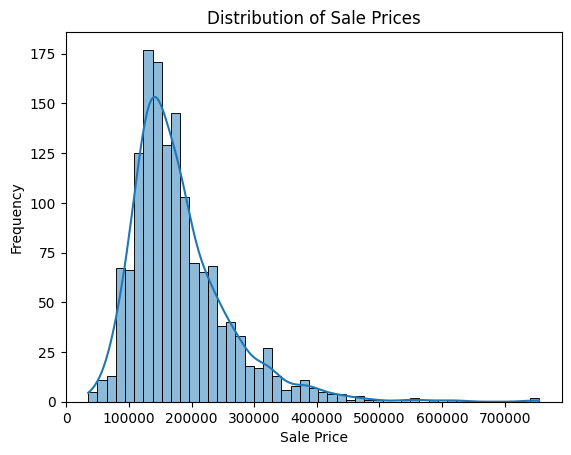

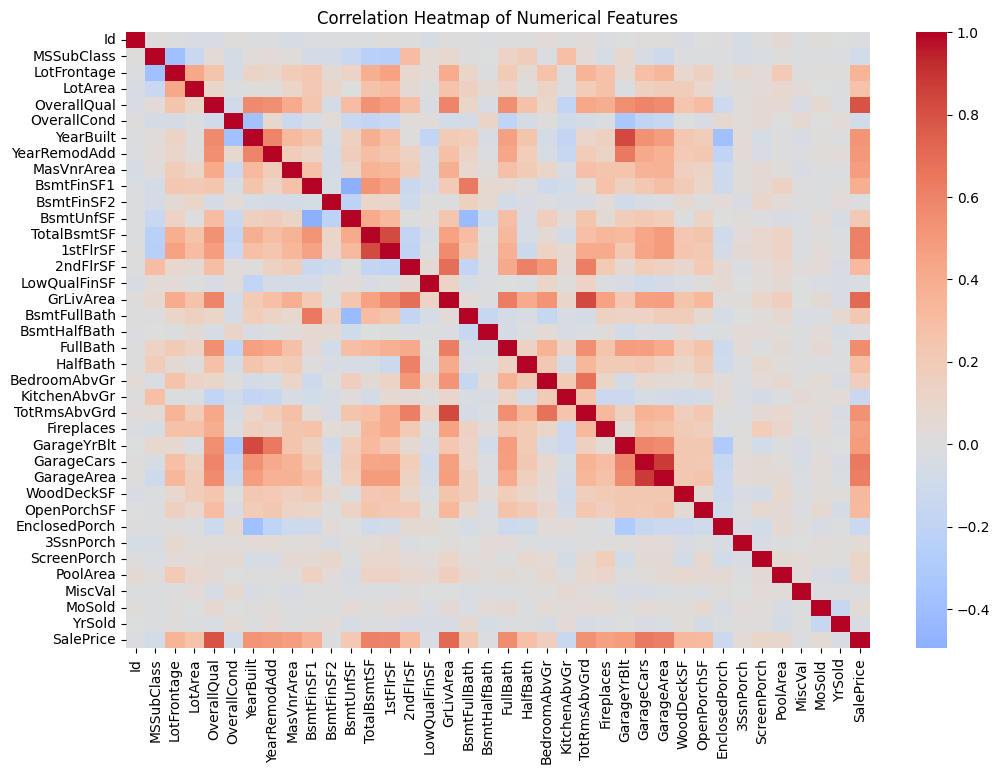

In [189]:
# Display graphs
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(train["SalePrice"], kde=True)
plt.title("Distribution of Sale Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

numeric_cols = train.select_dtypes(include=[np.number])
corr = numeric_cols.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### Part 2: Algorithm 
[I chose to use SVM Regressor because it works well with higher dimensions/complexity. Other methods like linear regression are too simple and can't handle the level of complexit that this data set exhibits. I will say that while it is built for higher complexity, it still can't handle too much complexity.]

In [190]:
# Insert first Algorithm Code
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_real_scaled = scaler.transform(X_test_real)
X_test_real.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OverallQual  1459 non-null   int64  
 1   LotArea      1459 non-null   int64  
 2   YearBuilt    1459 non-null   int64  
 3   MasVnrArea   1459 non-null   float64
 4   BsmtFinSF1   1459 non-null   int64  
 5   BsmtUnfSF    1459 non-null   float64
 6   1stFlrSF     1459 non-null   int64  
 7   2ndFlrSF     1459 non-null   int64  
 8   GrLivArea    1459 non-null   int64  
 9   Fireplaces   1459 non-null   int64  
 10  GarageYrBlt  1459 non-null   float64
 11  GarageArea   1459 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 136.9 KB


### Part 3: Training
[Describe breifly what is happening to the data during training]
During training, the training data is split into two groups: a training group and a testing group. The training group is used to fit the algorithm. Since ML algorithms are based on predicting outcomes from data, the training data is literally the data that it training the algorithm on what to predict. After the algoritm is "fitted," it can then be used with the test data to predict the accuracy of the model before using it on the real test data. For the hyperparameters themselves, I just guess and checked general numbers to see what worked.

In [191]:
# Insert your training code. 

svr = SVR(kernel='rbf', C=200, gamma=0.05, epsilon=0.15)
svr.fit(X_train_scaled, y_train)

,kernel,'rbf'
,degree,3
,gamma,0.05
,coef0,0.0
,tol,0.001
,C,200
,epsilon,0.15
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


### Part 4: Evaluation
I used the MSE error function as it is the error function that is used in the kaggle competitions. More generally, MSE is used for regressions, which is what my project is.

In [192]:
# Insert evaluation code

y_pred = svr.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)

print("Root Mean Squared Error:", np.sqrt(mse))

X_test_real = X_test_real.fillna(0)
predictions = svr.predict(X_test_real_scaled)
output = pd.DataFrame({'Id': test.Id, 'SalePrice': predictions})
output.to_csv('submission.csv', index=False)


Root Mean Squared Error: 77723.04486564048


### Conclusion

[Summarize your competition results. Highlight where you think your model preformed well and where there are still areas for improvement. Also highlight what the buggest challenges of this comptition were for you, and anything new that learned while completing it.]